In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv("/content/car_crashes.csv")

In [7]:
#Lets check which datasets are vaiable with SEABORN
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
df = sns.load_dataset('car_crashes')
print(df)

Assignment 2 Q.(A)
Compute and display summary statistics for each feature available in the dataset. (e.g.
minimum value, maximum value, mean, range, standard deviation, variance and
percentiles)

In [ ]:
print("This is manimum")
# Minimum value:
mini= df.min()
print(mini)
print()
print("This is maximum")
#maximum value
maxi = df.max()
print(maxi)

In [ ]:
#calculating varience:
variance = df.var()
print(variance)

In [17]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Ass 2 Q.(b)
Data Visualization-Create a histogram for each feature in the dataset to illustrate the
feature distributions.

In [ ]:
# Scatter Plot
x = df.speeding
y = df. alcohol
plt.scatter(x,y, color="Black")
plt.title("Scatter Plot")
plt.show()

In [ ]:
#Bar Plot
plt.xlabel("not_distracted")
plt.ylabel("no_previous")
plt.title("Bar Plot")
plt. bar(df.not_distracted, df.no_previous, color = "red")
plt. show()

Text(0.5, 1.0, 'Box Plot')

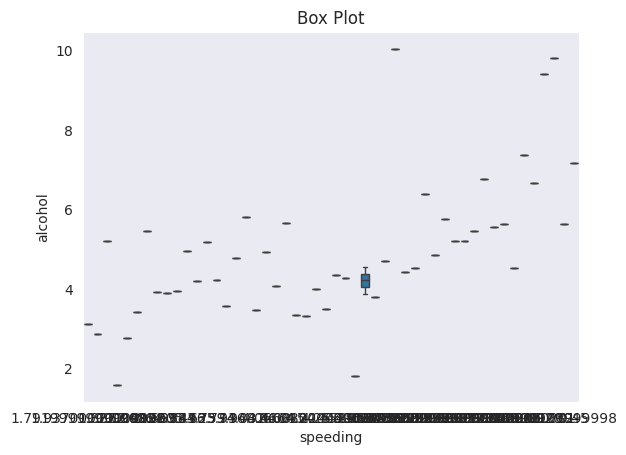

In [ ]:
#Box plot
sns.boxplot(x="speeding" , y="alcohol", data = df)
plt.title("Box Plot")

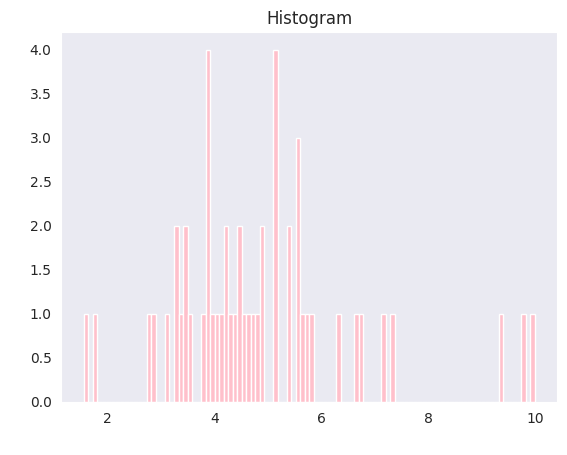

In [ ]:
#Histogram
s = (df.alcohol)
plt.hist(s, bins =100, align = "left", color ="pink")
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("Histogram")
plt.show()

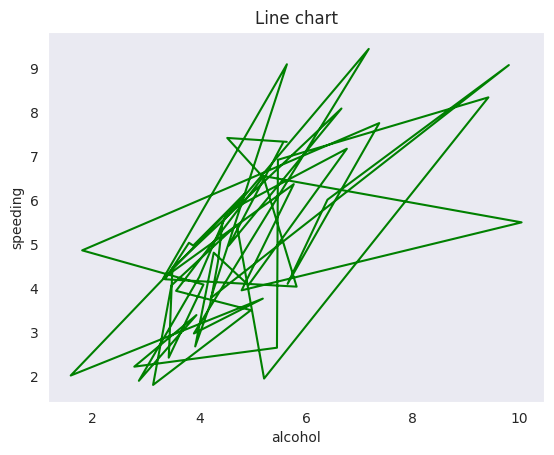

In [ ]:
# Line Chart
plt. plot(df.alcohol , df.speeding, color = "Green")
plt.xlabel("alcohol")
plt.ylabel("speeding")
plt.title("Line chart")
plt.show()

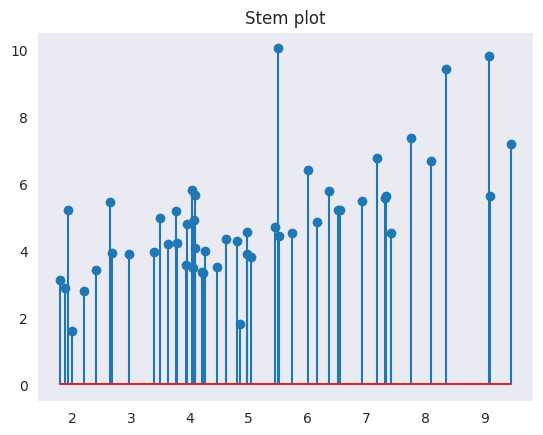

In [ ]:
#stem plot
x = df. speeding
y = df.alcohol
plt.stem(x,y)
plt.title("Stem plot")
plt.show()

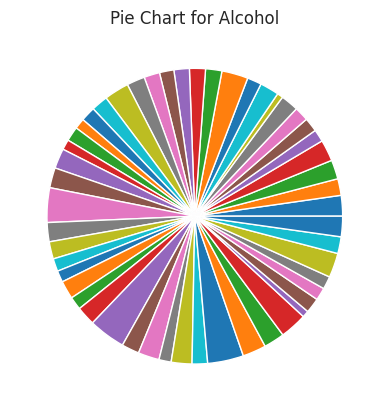

In [ ]:
# Pie Chart
y = df.alcohol
plt.pie(y)
plt.title("Pie Chart for Alcohol")
plt.show()

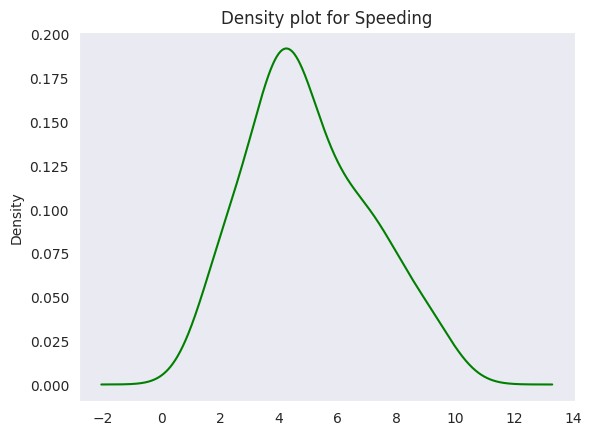

In [ ]:
data.speeding.plot.density(color='green')
plt.title('Density plot for Speeding')
plt.show()

In [ ]:
data = sns.load_dataset('car_crashers')
sns.pointplot(x = "alcohol",y = "speeding", data = data)
plt.show()

Ass 2 Q(c) :Data cleaning, Data integration, Data transformation, Data model building (e.g.
Classification)

In [ ]:
#data cleaning
# Check for missing values
print(data.isnull().sum())

# Assuming no missing values or making decisions to fill/drop them
# For demonstration, if there were missing values in 'ins_premium', you might fill them with the median:
# data['ins_premium'] = data['ins_premium'].fillna(data['ins_premium'].median())

# Check for duplicates
print(data.duplicated().sum())

# Drop duplicates if any
# data = data.drop_duplicates()


In [ ]:
#data integration
# Hypothetically, if you had another DataFrame 'demographics' to merge:
# data = pd.merge(data, demographics, on='abbrev', how='left')


In [ ]:
#data transformation
# Transform 'ins_premium' into a binary outcome for classification
threshold = data['ins_premium'].median()
data['high_premium'] = (data['ins_premium'] > threshold).astype(int)

# Standardize features (if using techniques sensitive to feature scales)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Assuming you want to standardize all numerical columns except 'high_premium'
features = data.select_dtypes(include=['float64', 'int64']).columns.drop('high_premium')
data[features] = scaler.fit_transform(data[features])


In [ ]:
#data model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into features and target
X = data.drop(['high_premium', 'abbrev'], axis=1)  # Dropping 'abbrev' as it's a non-numerical feature
y = data['high_premium']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
